In [82]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets

np.random.seed(1)


# get the data

In [83]:
X,Y=load_planar_dataset()
print(X.shape)
print(Y.shape)
print(X[:,0])
print(Y[:,0:5])


(2, 400)
(1, 400)
[1.20444229 3.57611415]
[[0 0 0 0 0]]


## visualize the data

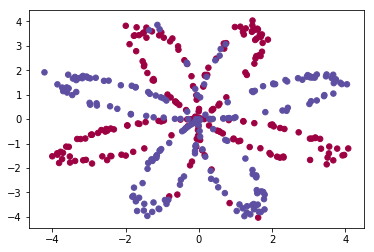

In [84]:
plt.scatter(X[0,:],X[1,:],c=Y[0,:],s=30,cmap=plt.cm.Spectral)


In [85]:
dim=X.shape[0]
m=X.shape[1]


# Simple logistic regression

## built-in function

In [86]:
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)


C:\Users\勤奋的黑痴\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\勤奋的黑痴\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:2052: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

Text(0.5,1,'Logistic Regression')

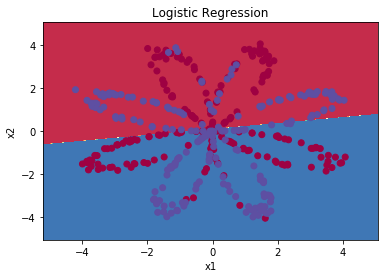

In [87]:
plot_decision_boundary(lambda x : clf.predict(x),X,Y)
plt.title('Logistic Regression')


In [88]:
#print accuracy
Lr_predictions=clf.predict(X.T)
Y_predict=Lr_predictions.reshape((1,400))
# print(Y)
# print(Y_predict)

accuracy2=((np.dot(Y_predict,Y.T)+np.dot(1-Y_predict,(1-Y).T))/m)[0,0]
print(accuracy2)
accuracy=(m-np.sum(abs(np.array(Y,dtype=float)-np.array(Y_predict,dtype=float)),axis=1,keepdims=False)[0])/m
print('the accuracy of logistic regression is :{} %'.format(accuracy*100))


0.47
the accuracy of logistic regression is :47.0 %


##  my own logistic regression

In [89]:
def lr_init(dim):
    
    """init w and b"""
    
    w=np.random.rand(dim,1)
    b=0
    return w,b
# w,b=lr_init(dim)


In [90]:
def lr_propogate(X,Y,w,b):
    
    """propogate one step"""
    
    m=X.shape[1]
    Z=np.dot(w.T,X)+b
    A=sigmoid(Z)
    dz=A-Y
    assert(dz.shape==(1,m))
    cost=(-(np.dot(Y,np.log(A).T)+np.dot((1-Y),np.log(1-A).T))/m)[0,0]
    dw=np.dot(X,dz.T)/m
    db=1/m*np.sum(dz)
    
    grads={'dw':dw,
           'db':db}
    
    return grads,cost


In [91]:
def lr_optimize(X,Y,w,b, learning_rate,num_iterations=1000, print_cost=False):
    """
    Returns:
    params:
        w
        b
    grads:
        dw
        db
    """
    costs=[]
    for i in range(num_iterations):
        grads,cost=lr_propogate(X,Y,w,b)
        dw=grads['dw']
        db=grads['db']
        w=w-learning_rate*dw
        b=b-learning_rate*db
        if i%50==0:
            costs.append(cost)
            if print_cost==True:
                print('cost after iteration {} is :{}'.format(i,cost))
    params={'w':w,
            'b':b}
    grads={'dw':dw,
           'db':db}
    return params,grads,costs


In [92]:
def lr_predict(w,b,X):
    Y_predict=sigmoid(np.dot(w.T,X)+b).reshape(1,X.shape[1])
    for i in range(Y_predict.shape[1]):
        if Y_predict[0,i]>0.5:
            Y_predict[0,i]=1
        else:
            Y_predict[0,i]=0
    return Y_predict


In [93]:
def lr_model(X_train,Y_train,learning_rate,num_iterations=1000,print_cost=False):
    
    m=X_train.shape[1]
    w,b=lr_init(X_train.shape[0])
    params,grads,costs=lr_optimize(X_train,Y_train,w,b,learning_rate=0.001,num_iterations=num_iterations,print_cost=print_cost)
    w=params['w']
    b=params['b']
    
    Y_predict=lr_predict(w,b,X_train)
    training_accuracy=((np.dot(Y_predict,Y.T)+np.dot(1-Y_predict,(1-Y).T))/m)[0,0]
    print('the training_accuracy is:{}%'.format(training_accuracy*100))
    
    d={'w':w,
       'b':b,
       'training_accuracy':training_accuracy,
       'num_iterations':num_iterations,
       'learning_rate':learning_rate,
       'costs':costs}  
    return d


In [94]:
d=lr_model(X,Y,0.001,num_iterations=4000,print_cost=True)


cost after iteration 0 is :1.25929436981919
cost after iteration 50 is :1.2283891108942948
cost after iteration 100 is :1.1982672422823863
cost after iteration 150 is :1.1689609968647823
cost after iteration 200 is :1.1405016931048961
cost after iteration 250 is :1.1129193652197684
cost after iteration 300 is :1.0862423680843996
cost after iteration 350 is :1.0604969620090436
cost after iteration 400 is :1.035706884480295
cost after iteration 450 is :1.0118929181242677
cost after iteration 500 is :0.9890724663951903
cost after iteration 550 is :0.9672591506036936
cost after iteration 600 is :0.9464624436029281
cost after iteration 650 is :0.9266873564402873
cost after iteration 700 is :0.9079341942612722
cost after iteration 750 is :0.890198396488759
cost after iteration 800 is :0.8734704736859651
cost after iteration 850 is :0.8577360496002335
cost after iteration 900 is :0.8429760119163663
cost after iteration 950 is :0.8291667696299515
cost after iteration 1000 is :0.816280609208774

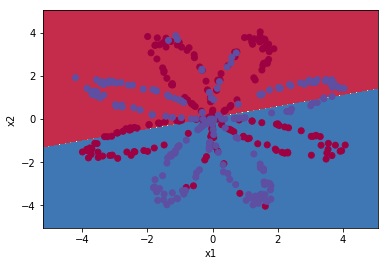

In [95]:
# print(d['training_accuracy'])
w=d['w']
b=d['b']
    
plot_decision_boundary(lambda x :np.where(sigmoid(np.dot(w.T,x.T)+b)>0.5,1,0),X,Y)


## Why logistic regression performs bad on the above data set?

the dataset is not linearly seperable 

# Neural Network Model

## define the neural network structure

n_x  : the size of input layer    
n_h  : the size of hidden layer  
n_y  : the size of output layer  

In [96]:
def layer_sizes(X,Y,n_h):
    """
    Arguments:
    X,Y,n_h
    
    Returns:
    n_x,n_h,n_y
    """
    n_x=  X.shape[0]
    n_y= Y.shape[0]
    n_h=n_h
    return n_x,n_h,n_y
    

## initialize the model's parameters

In [97]:
def initialize_parameters(n_x,n_h,n_y):
    """
    Arguments:
    n_x,n_h,n_y
    
    Returns:
    parameters:W1,b1,W2,b2
    
    """
    np.random.seed(2)    
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    
    parameters={"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2}
    
    assert(W1.shape==(n_h,n_x))
    assert(b1.shape==(n_h,1))
    assert(W2.shape==(n_y,n_h))
    assert(b2.shape==(n_y,1))
    
    return parameters
    

## forward propagation

In [98]:
def forward_propagation(X,parameters):
    """
    X.shape=(n_x,m)

    Returns:
    cache:Z1,Z2,A1,A2
    A2
    """
    W1=parameters['W1']# (n_h,n_x)
    b1=parameters['b1']# (n_h,1)
    W2=parameters['W2']# (n_y,n_h)
    b2=parameters['b2']# (n_y,1)
    
    Z1=np.dot(W1,X)+b1#(n_h,m)
    A1=np.tanh(Z1)#(n_h,m)
    Z2=np.dot(W2,A1)+b2 #(n_y,m)
    A2=sigmoid(Z2)#(n_y,m)
    
    cache={'Z1':Z1,
           'Z2':Z2,
           'A1':A1,
           'A2':A2}  
    return  cache,A2


## compute cost

np.multiply: element-wise

To compute the cost, you can:  
np.multiply,np.sum  
    or  
np.dot  

In [99]:
def compute_cost(A2,Y,parameters):
    """
    Arguments:
    Y.shape=(n_y,m)
    A2.shape=(n_y,m)
    
    Returns:
    cost
    """
    temp=-np.sum((Y*np.log(A2)+(1-Y)*np.log(1-A2)),axis=1)/m
    cost=np.squeeze(temp)
    
#     logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y)
#     cost = - np.sum(logprobs)/m

    return cost


## backward propagation

In [100]:
def backward_propagation(parameters,cache,X,Y):
    """
    Arguments:
    parameters
    cache
    X.shape=(n_x,m)
    Y.sahpe=(n_y,m)
    
    Returns:
    grads:dW2,db2,dW1,db1
    """
    m=X.shape[1]
    
    W2=parameters['W2']#(n_y,n_h)
    W1=parameters['W1']#(n_h,n_x)
    
    A2=cache['A2']#(n_y,m)
    A1=cache['A1']#(n_h,m)
    Z1=cache['Z1']#(n_h,m)
    Z2=cache['Z2']#(n_y,m)
    
    dZ2=A2-Y#(n_y,m)
    dW2=1/m*np.dot(dZ2,A1.T)#(n_y,n_h)
    db2=1/m*np.sum(dZ2,axis=1,keepdims=True)#(n_y,1)
    dZ1=np.dot(W2.T,dZ2)*(1-np.power(A1,2))#(n_h,m)
    dW1=1/m*np.dot(dZ1,X.T)#(n_h,n_x)
    db1=1/m*(np.sum(dZ1,axis=1,keepdims=True))#(n_h,1)
    
    grads={'dW2':dW2,
           'db2':db2,
           'dW1':dW1,
           'db1':db1}
    return grads

## update parameters

In [101]:
def update_paramters(parameters,grads,learning_rate=0.01):
    """"""
    W2=parameters['W2']
    b2=parameters['b2']
    W1=parameters['W1']
    b1=parameters['b1']
    dW2=grads['dW2']
    db2=grads['db2']
    dW1=grads['dW1']
    db1=grads['db1']
    
    W2=W2-learning_rate*dW2
    W1=W1-learning_rate*dW1
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
    paramters={'W2':W2,
               'W1':W1,
               'b2':b2,
               'b1':b1}
    
    return paramters


## nn model:integrate the above parts

In [102]:
def nn_model(X,Y,hidden_size,learning_rate,num_iterations=10000,print_cost=False):
    """
    Returns:
    parameters
    costs
    """
    n_x,n_h,n_y=layer_sizes(X,Y,hidden_size)
    parameters=initialize_parameters(n_x,n_h,n_y)
    costs=[]
    
    for i in range(num_iterations):
        cache,A2=forward_propagation(X,parameters)
        cost=compute_cost(A2,Y,parameters)
        grads=backward_propagation(parameters,cache,X,Y)
        parameters=update_paramters(parameters,grads,learning_rate=learning_rate)
        if i%1000==0:
            costs.append(cost)
        if i%1000==0 and print_cost==True:
            print('cost after iteration {} is:{}'.format(i,cost))
    
    d={'parameters':parameters,
       'costs':costs}
    return d

## predict

In [103]:
def predict(parameters,X):
    """
    Returns:
    predictions
    """
    cache,A2=forward_propagation(X,parameters)
    predictions=np.round(A2)
    
    return predictions

## run the model

cost after iteration 0 is:0.6930480201239823
cost after iteration 1000 is:0.29229023562502565
cost after iteration 2000 is:0.2763571492078683
cost after iteration 3000 is:0.2408350186613065
cost after iteration 4000 is:0.2310600319429368
cost after iteration 5000 is:0.2260242509095668
cost after iteration 6000 is:0.22267730382455533
cost after iteration 7000 is:0.22018493619014962
cost after iteration 8000 is:0.21820806978190718
cost after iteration 9000 is:0.21658787551631156


Text(0.5,1,'Decision Boundary for hidden layer size 4')

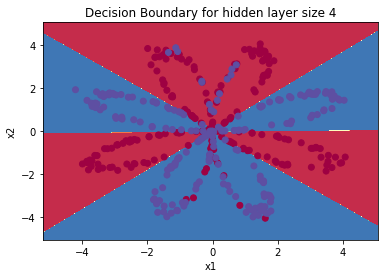

In [112]:
d=nn_model(X,Y,4,1,num_iterations=10000,print_cost=True)

plot_decision_boundary(lambda x: predict(d['parameters'], x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))


In [111]:
Y_predict=predict(d['parameters'],X)
accuracy=np.squeeze((np.dot(Y,Y_predict.T)+np.dot(1-Y,1-Y_predict.T))/m)
print('the accuracy is:{}%'.format(accuracy*100))

the accuracy is:90.75%


## compare different sizes of hidden layer

the accuracy of 1 hidden units is:67.5%
the accuracy of 2 hidden units is:67.25%
the accuracy of 3 hidden units is:90.75%
the accuracy of 4 hidden units is:90.5%
the accuracy of 5 hidden units is:91.25%
the accuracy of 10 hidden units is:90.25%
the accuracy of 15 hidden units is:90.75%
the accuracy of 20 hidden units is:90.0%
the accuracy of 30 hidden units is:90.25%
the accuracy of 40 hidden units is:90.75%
the accuracy of 50 hidden units is:90.75%


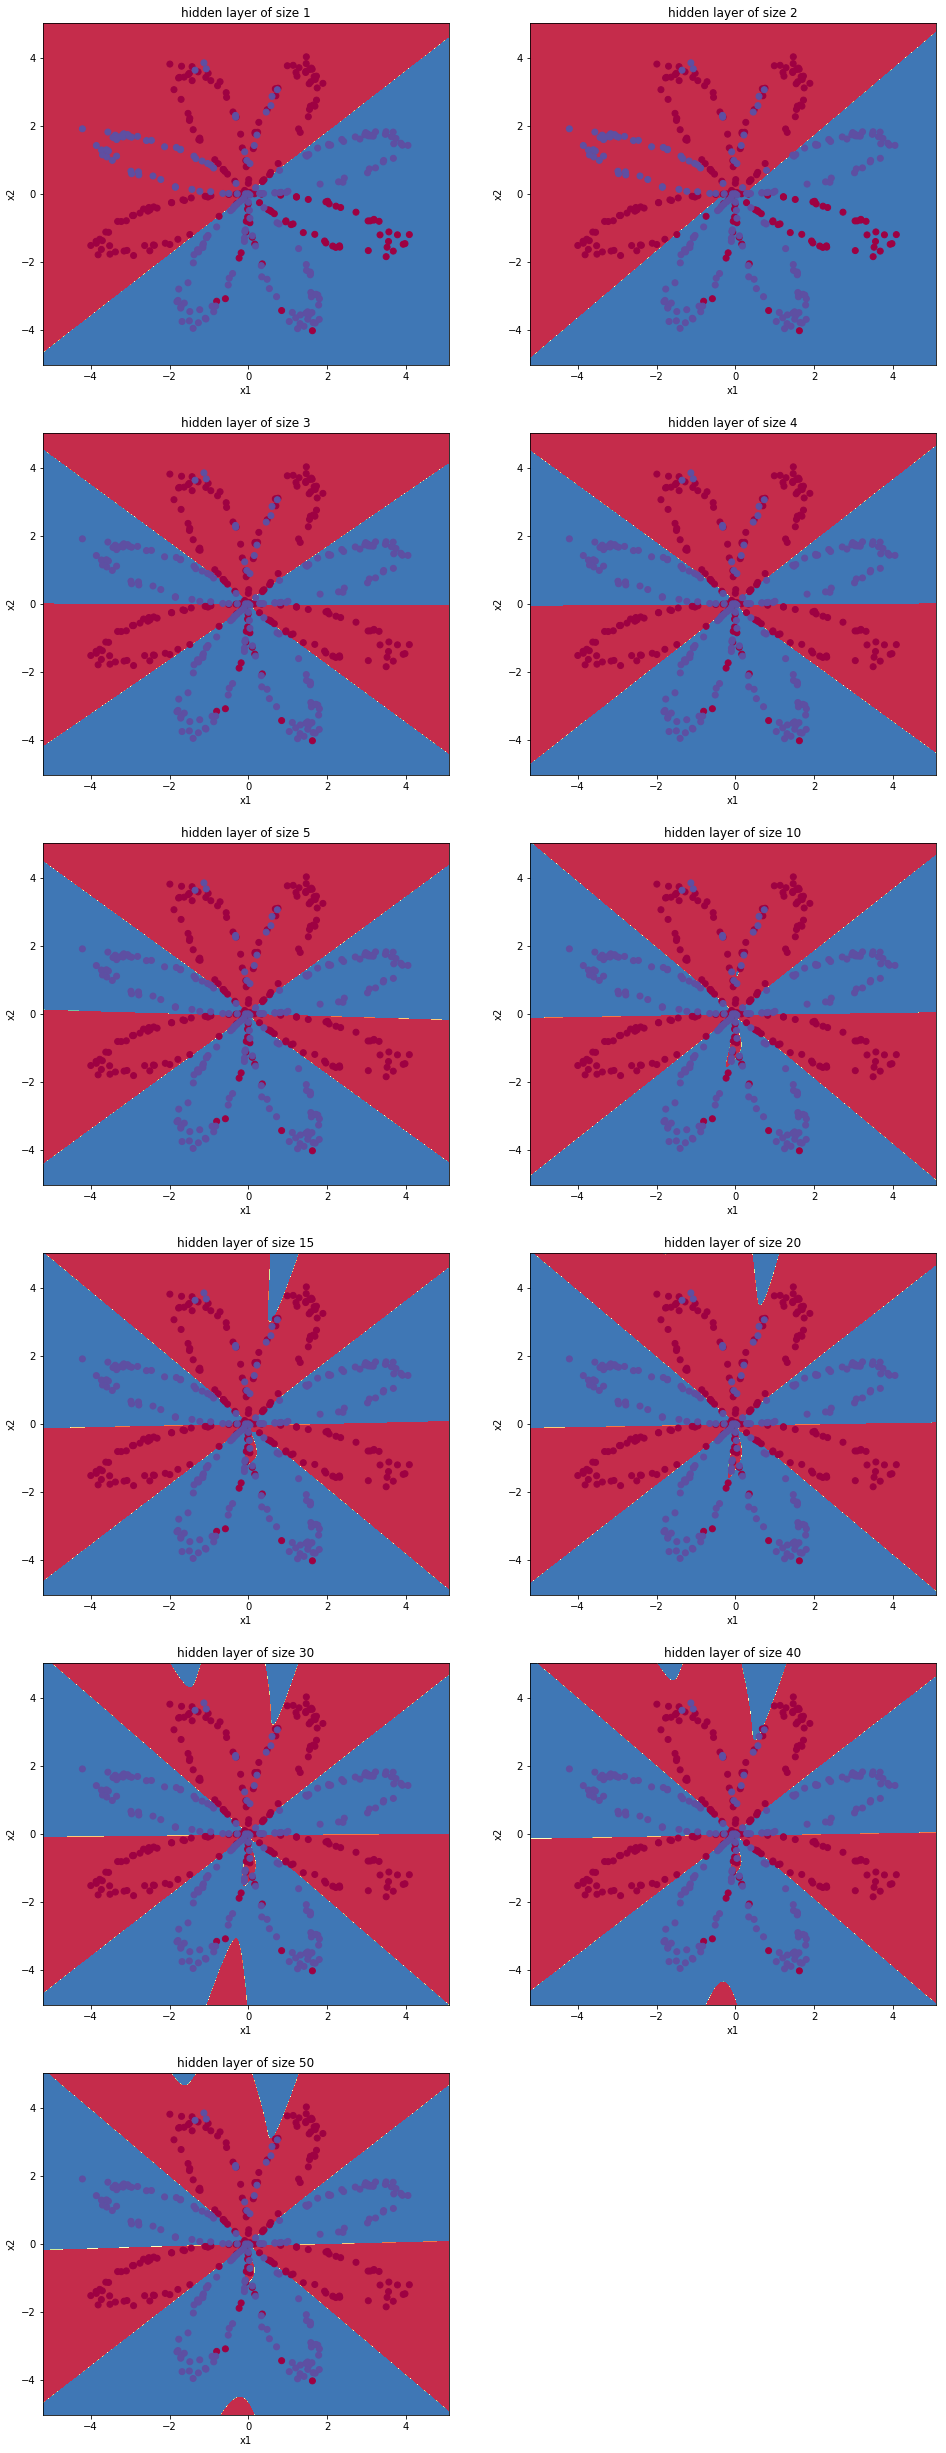

In [127]:
hidden_layer_sizes=[1,2,3,4,5,10,15,20,30,40,50]
n=len(hidden_layer_sizes)
plt.figure(figsize=(16,16*n/4))
for i,n_h in enumerate(hidden_layer_sizes):
    plt.subplot(n//2+1,2,i+1)
    plt.title('hidden layer of size {}'.format(n_h))
    d=nn_model(X,Y,n_h,1.2,num_iterations=5000,print_cost=False)
    plot_decision_boundary(lambda x: predict(d['parameters'], x.T), X, Y)
    
    Y_predict=predict(d['parameters'],X)
    accuracy=np.squeeze((np.dot(Y,Y_predict.T)+np.dot(1-Y,1-Y_predict.T))/m)
    print('the accuracy of {} hidden units is:{}%'.format(n_h,accuracy*100))